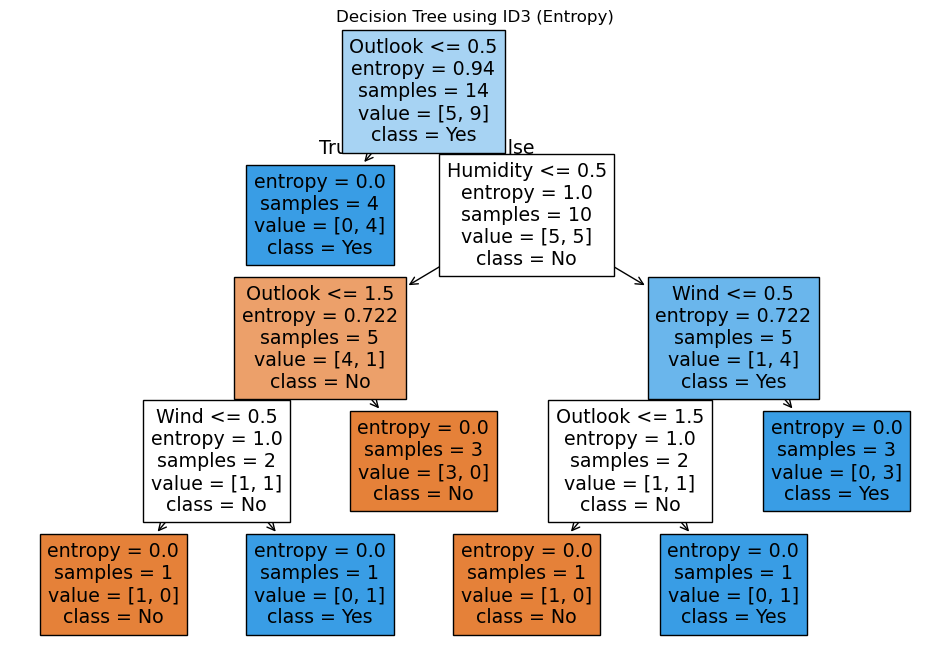

In [1]:
# AIM: Program to demonstrate Decision Tree ID3 Algorithm

# Import libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Sample Dataset: [Outlook, Temperature, Humidity, Wind]
# Labels: 0 = No, 1 = Yes (Play Tennis or Not)
X = [
    ['Sunny', 'Hot', 'High', 'Weak'],
    ['Sunny', 'Hot', 'High', 'Strong'],
    ['Overcast', 'Hot', 'High', 'Weak'],
    ['Rain', 'Mild', 'High', 'Weak'],
    ['Rain', 'Cool', 'Normal', 'Weak'],
    ['Rain', 'Cool', 'Normal', 'Strong'],
    ['Overcast', 'Cool', 'Normal', 'Strong'],
    ['Sunny', 'Mild', 'High', 'Weak'],
    ['Sunny', 'Cool', 'Normal', 'Weak'],
    ['Rain', 'Mild', 'Normal', 'Weak'],
    ['Sunny', 'Mild', 'Normal', 'Strong'],
    ['Overcast', 'Mild', 'High', 'Strong'],
    ['Overcast', 'Hot', 'Normal', 'Weak'],
    ['Rain', 'Mild', 'High', 'Strong']
]

y = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]  # Target

# Convert categorical features to numerical
df = pd.DataFrame(X, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Create Decision Tree model using ID3 (Entropy)
model = DecisionTreeClassifier(criterion="entropy")
model.fit(df, y)

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=df.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree using ID3 (Entropy)")
plt.show()


Slope (m): 9.583333333333332
Intercept (b): 5.4166666666666785


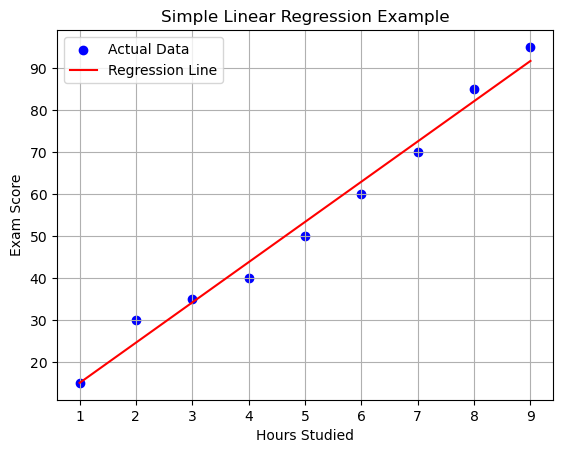

In [4]:
# Import required libraries 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Sample Data: (e.g., Hours Studied vs Exam Score)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1) # Independent variable
y = np.array([15, 30, 35, 40, 50, 60, 70, 85, 95])	# Dependent variable


# Create Linear Regression model 
model = LinearRegression()

# Fit the model (Train) 
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)


# Display the model coefficients 
print("Slope (m):", model.coef_[0]) 
print("Intercept (b):", model.intercept_)

 
# Plotting the results
plt.scatter(X, y, color='blue', label='Actual Data') 
plt.plot(X, y_pred, color='red', label='Regression Line') 
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Simple Linear Regression Example') 
plt.legend()
plt.grid(True) 
plt.show() 

Prediction for 6.5 hours studied: Pass
Probability of passing: 0.91


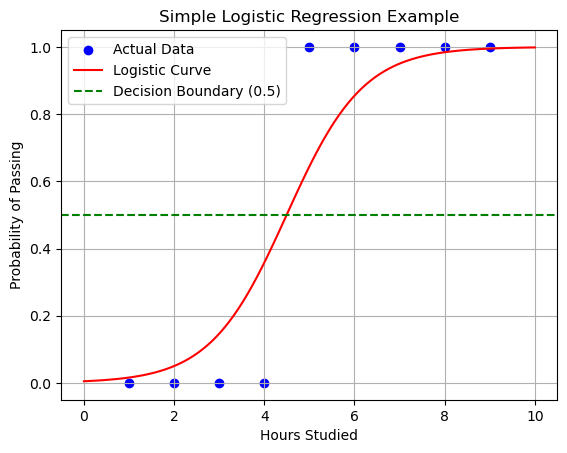

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


# Sample data: Hours studied vs Pass (1) / Fail (0) 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1]) # 0 = Fail, 1 = Pass


# Create Logistic Regression model 
model = LogisticRegression()

# Train the model 
model.fit(X, y)

# Predict for a new value 
hours = 6.5
prediction = model.predict([[hours]]) 
probability = model.predict_proba([[hours]])

print(f"Prediction for {hours} hours studied: {'Pass' if prediction[0] == 1 else 'Fail'}") 
print(f"Probability of passing: {probability[0][1]:.2f}")

# Plotting the results
x_vals = np.linspace(0, 10, 100).reshape(-1, 1)

 
y_probs = model.predict_proba(x_vals)[:, 1]


plt.scatter(X, y, color='blue', label='Actual Data') 
plt.plot(x_vals, y_probs, color='red', label='Logistic Curve')
plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)') 
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing') 
plt.title('Simple Logistic Regression Example') 
plt.legend()
plt.grid(True) 
plt.show() 

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



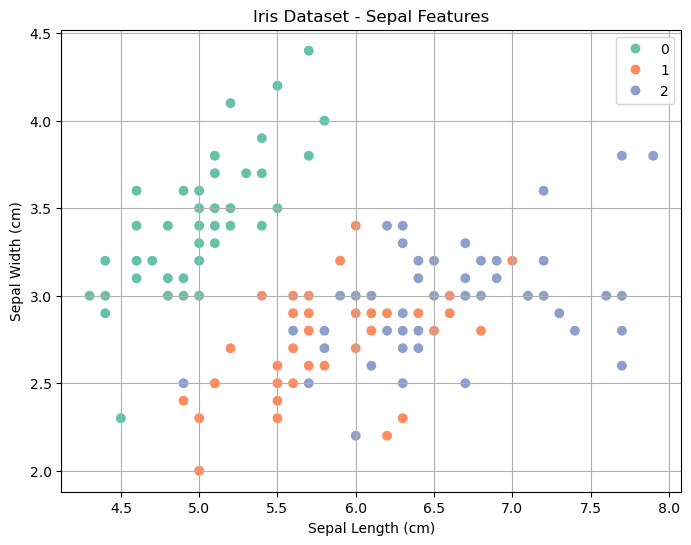

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Iris dataset 
iris = load_iris()
X = iris.data # Features: sepal/petal length and width
y = iris.target # Labels: 0=setosa, 1=versicolor, 2=virginica


# Split into training and test data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create KNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)


# Train the model 
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)



 
# Output results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


# Optional: Visualize using sepal length vs sepal width 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target, palette='Set2', s=60) 
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)') 
plt.title('Iris Dataset - Sepal Features') 
plt.grid(True)
plt.show()
